In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 

from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


warnings.filterwarnings(action='ignore')

In [40]:
train_df = pd.read_csv('../Data/train.csv') # Train
val_df = pd.read_csv('../Data/val.csv') # Validation

val_normal, val_fraud = val_df['Class'].value_counts()
val_contamination = val_fraud / val_normal

train_x = train_df.drop(columns=['ID']) 

def get_pred_label(model_pred):
    model_pred = np.where(model_pred == 1, 0, model_pred)
    model_pred = np.where(model_pred == -1, 1, model_pred)
    return model_pred

val_x = val_df.drop(columns=['ID', 'Class']) # Input Data
val_y = val_df['Class'] # Label

In [41]:
def remove_out(dataframe, remove_col,num1):
    dff = dataframe

    level_1q = dff[remove_col].quantile(0.25)
    level_3q = dff[remove_col].quantile(0.75)
    IQR = level_3q - level_1q
    rev_range = num1 # 제거 범위 조절 변수
            
    return dff[(dff[remove_col] >= level_3q + (rev_range * IQR)) | (dff[remove_col] <= level_1q - (rev_range * IQR))].index

def right_remove_out(dataframe, remove_col,num1):
    dff = dataframe

    level_1q = dff[remove_col].quantile(0.25)
    level_3q = dff[remove_col].quantile(0.75)
    IQR = level_3q - level_1q
    rev_range = num1 # 제거 범위 조절 변수
            
    return dff[(dff[remove_col] >= level_3q + (rev_range * IQR))].index

def left_remove_out(dataframe, remove_col,num1):
    dff = dataframe

    level_1q = dff[remove_col].quantile(0.25)
    level_3q = dff[remove_col].quantile(0.75)
    IQR = level_3q - level_1q
    rev_range = num1 # 제거 범위 조절 변수
            
    return dff[(dff[remove_col] <= level_1q - (rev_range * IQR))].index



In [42]:
len(train_df) * 0.01

1138.42

In [43]:
train_df2 = train_df[:]
colnames = ['V6','V20','V23','V24','V25','V28']
for col in colnames:
    for j in range(2,20):
        index = remove_out(val_df,col,j)
        if (len(index) < len(train_df) * 0.0005):
            train_df2.drop(list(index), axis=0,inplace=True)
            train_df2.reset_index(drop=True,inplace=True)
            break



In [44]:
val_contamination

0.0010551491277433877

V7 오른쪽 제거 또는 제거  
V3 왼쪽에만 사기거래 오른쪽 제거  
V9 왼쪽에만 사기거래 오른쪽 제거  
V10 왼쪽에만 사기거래 오른쪽 제거  
V2는 한쪽으로만 이상 거래가 있다. 한쪽 이상치 제거 왼쪽 제거  
V11 오른쪽에만 사기거래 왼쪽 제거

In [45]:

colnames = ['V7','V3','V9','V10']
for col in colnames:
    for j in range(1,20):
        index = right_remove_out(val_df,col,j)
        if (len(index) < len(train_df) * 0.0005):
            train_df2.drop(list(index), axis=0,inplace=True)
            train_df2.reset_index(drop=True,inplace=True)
            break
        

colnames = ['V2','V11']
for col in colnames:
    for j in range(1,20):
        index = left_remove_out(val_df,col,j)
        if (len(index) < len(train_df) * 0.0005):
            train_df2.drop(list(index), axis=0,inplace=True)
            train_df2.reset_index(drop=True,inplace=True)
            break        

V1 제거
V26 제거
V27 이상치는 많은데 규칙이 없음 제거
V29 제거
V30 제거
V5 제거
V4 제거
V8 제거
V21,V22 제거


In [46]:
# delcollist = ['V1','V4','V5','V8','V21','V22','V26','V27','V29','V30']

# train_df2.drop(delcollist, axis=1,inplace=True)

In [47]:
train_df2

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,3,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,4,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,6,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960
3,8,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901
4,9,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113373,284796,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,...,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,-0.169496,1.034857
113374,284797,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,0.190241,-0.249058,0.666458,...,0.144008,0.634646,-0.042114,-0.053206,0.316403,-0.461441,0.018265,-0.041068,0.530986,1.034881
113375,284798,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,-0.230699,1.034904
113376,284802,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,-0.269825,1.034939


In [48]:

collist01 = ['V3','V9','V11','V12','V16']
train_x = train_df2.drop(['ID'],axis=1)
train_x =train_x.loc[:,collist01]
model = IsolationForest(n_estimators=50, max_samples=len(train_x), contamination=val_contamination, random_state=42, verbose=0)
model.fit(train_x)
## Evaluation : Validation set
def get_pred_label(model_pred):
    # IsolationForest 모델 출력 (1:정상, -1:불량(사기)) 이므로 (0:정상, 1:불량(사기))로 Label 변환
    model_pred = np.where(model_pred == 1, 0, model_pred)
    model_pred = np.where(model_pred == -1, 1, model_pred)
    return model_pred
val_x = val_df.drop(columns=['ID', 'Class']) # Input Data
val_x.drop(columns=delcollist, axis=1,inplace=True)
val_x = val_x.loc[:,collist01]
val_y = val_df['Class'] # Label

val_pred = model.predict(val_x) # model prediction
val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y, val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y, val_pred))

Validation F1 Score : [0.8033779981712035]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.65      0.57      0.61        30

    accuracy                           1.00     28462
   macro avg       0.83      0.78      0.80     28462
weighted avg       1.00      1.00      1.00     28462



In [168]:
val_x2 = val_x[:]
val_x2['score'] = model.decision_function(val_x.to_numpy())
val_x2['pred'] = val_pred
val_x2['Class'] = val_y

In [169]:
model.decision_function

<bound method IsolationForest.decision_function of IsolationForest(contamination=0.0010551491277433877, max_samples=113378,
                n_estimators=30, random_state=42)>

In [170]:
val_x3 = val_x2[:]
val_x4 = val_x3[val_x3.Class == 1]

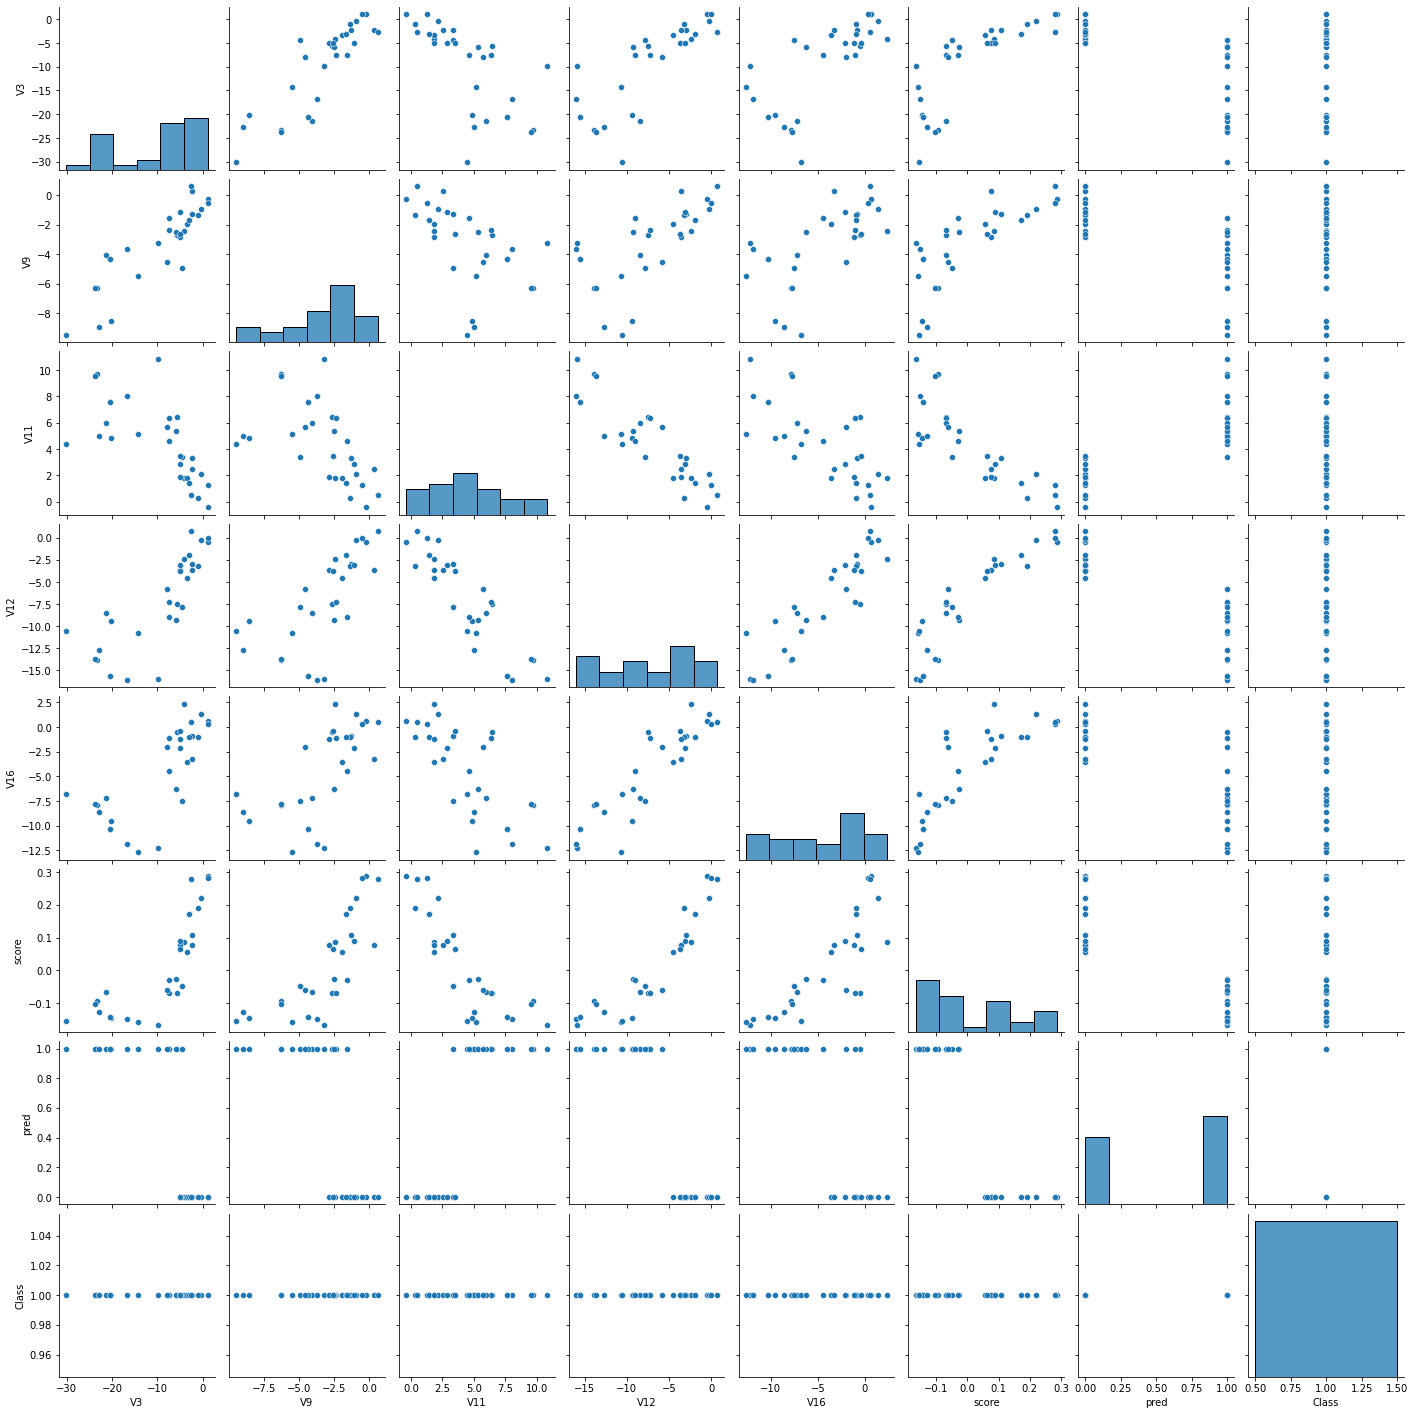

In [171]:
sns.pairplot(
    val_x4
)

In [153]:
val_x.to_numpy()

array([[ 1.04436655, -0.73672732, -0.36684564, ...,  0.83638957,
         0.73945278,  0.47667726],
       [-0.17147905, -1.1913111 ,  0.72439631, ...,  0.40677358,
        -0.60223177, -1.73716203],
       [ 0.19400846, -0.89628717,  0.75795233, ..., -0.66086332,
         0.29540381, -0.45145292],
       ...,
       [-0.16858299, -0.41711586,  0.07660452, ..., -0.690868  ,
        -1.12990381, -0.20186183],
       [-1.19682531,  0.43540186,  0.26777235, ...,  0.55904677,
         0.22536134, -0.1630486 ],
       [ 0.70251023,  0.39208671, -0.39912565, ..., -0.96288614,
        -0.60857713,  1.11398059]])

In [97]:
test = pd.read_csv("./Data/test.csv")
test.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,AAAA0x1,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,-0.994983
1,AAAA0x2,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,-0.994983
2,AAAA0x5,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,-0.994960
3,AAAA0x7,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.237686,-0.994937
4,AAAA0xc,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,...,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,-0.167819,-0.994866


In [91]:
test_x = test.drop(columns=['ID'],axis=1)


In [99]:
test_x.drop(columns=delcollist,axis=1,inplace=True)



KeyError: "['V1' 'V4' 'V5' 'V8' 'V21' 'V22' 'V26' 'V27' 'V29' 'V30'] not found in axis"

In [109]:
# test_x = test.loc[:,['V3','V9','V10','V11','V12','V16','V18']]
test_pred = model.predict(test_x)
test_pred = get_pred_label(test_pred)

In [106]:
sum(test_pred == -1)

250

In [110]:
submit = pd.read_csv('./Data/sample_submission.csv')
submit.head()
submit['Class'] = test_pred
submit.to_csv('./submit.csv', index=False)

In [147]:
tval =val_df[val_df['Class'] == 1].drop('ID',axis=1)

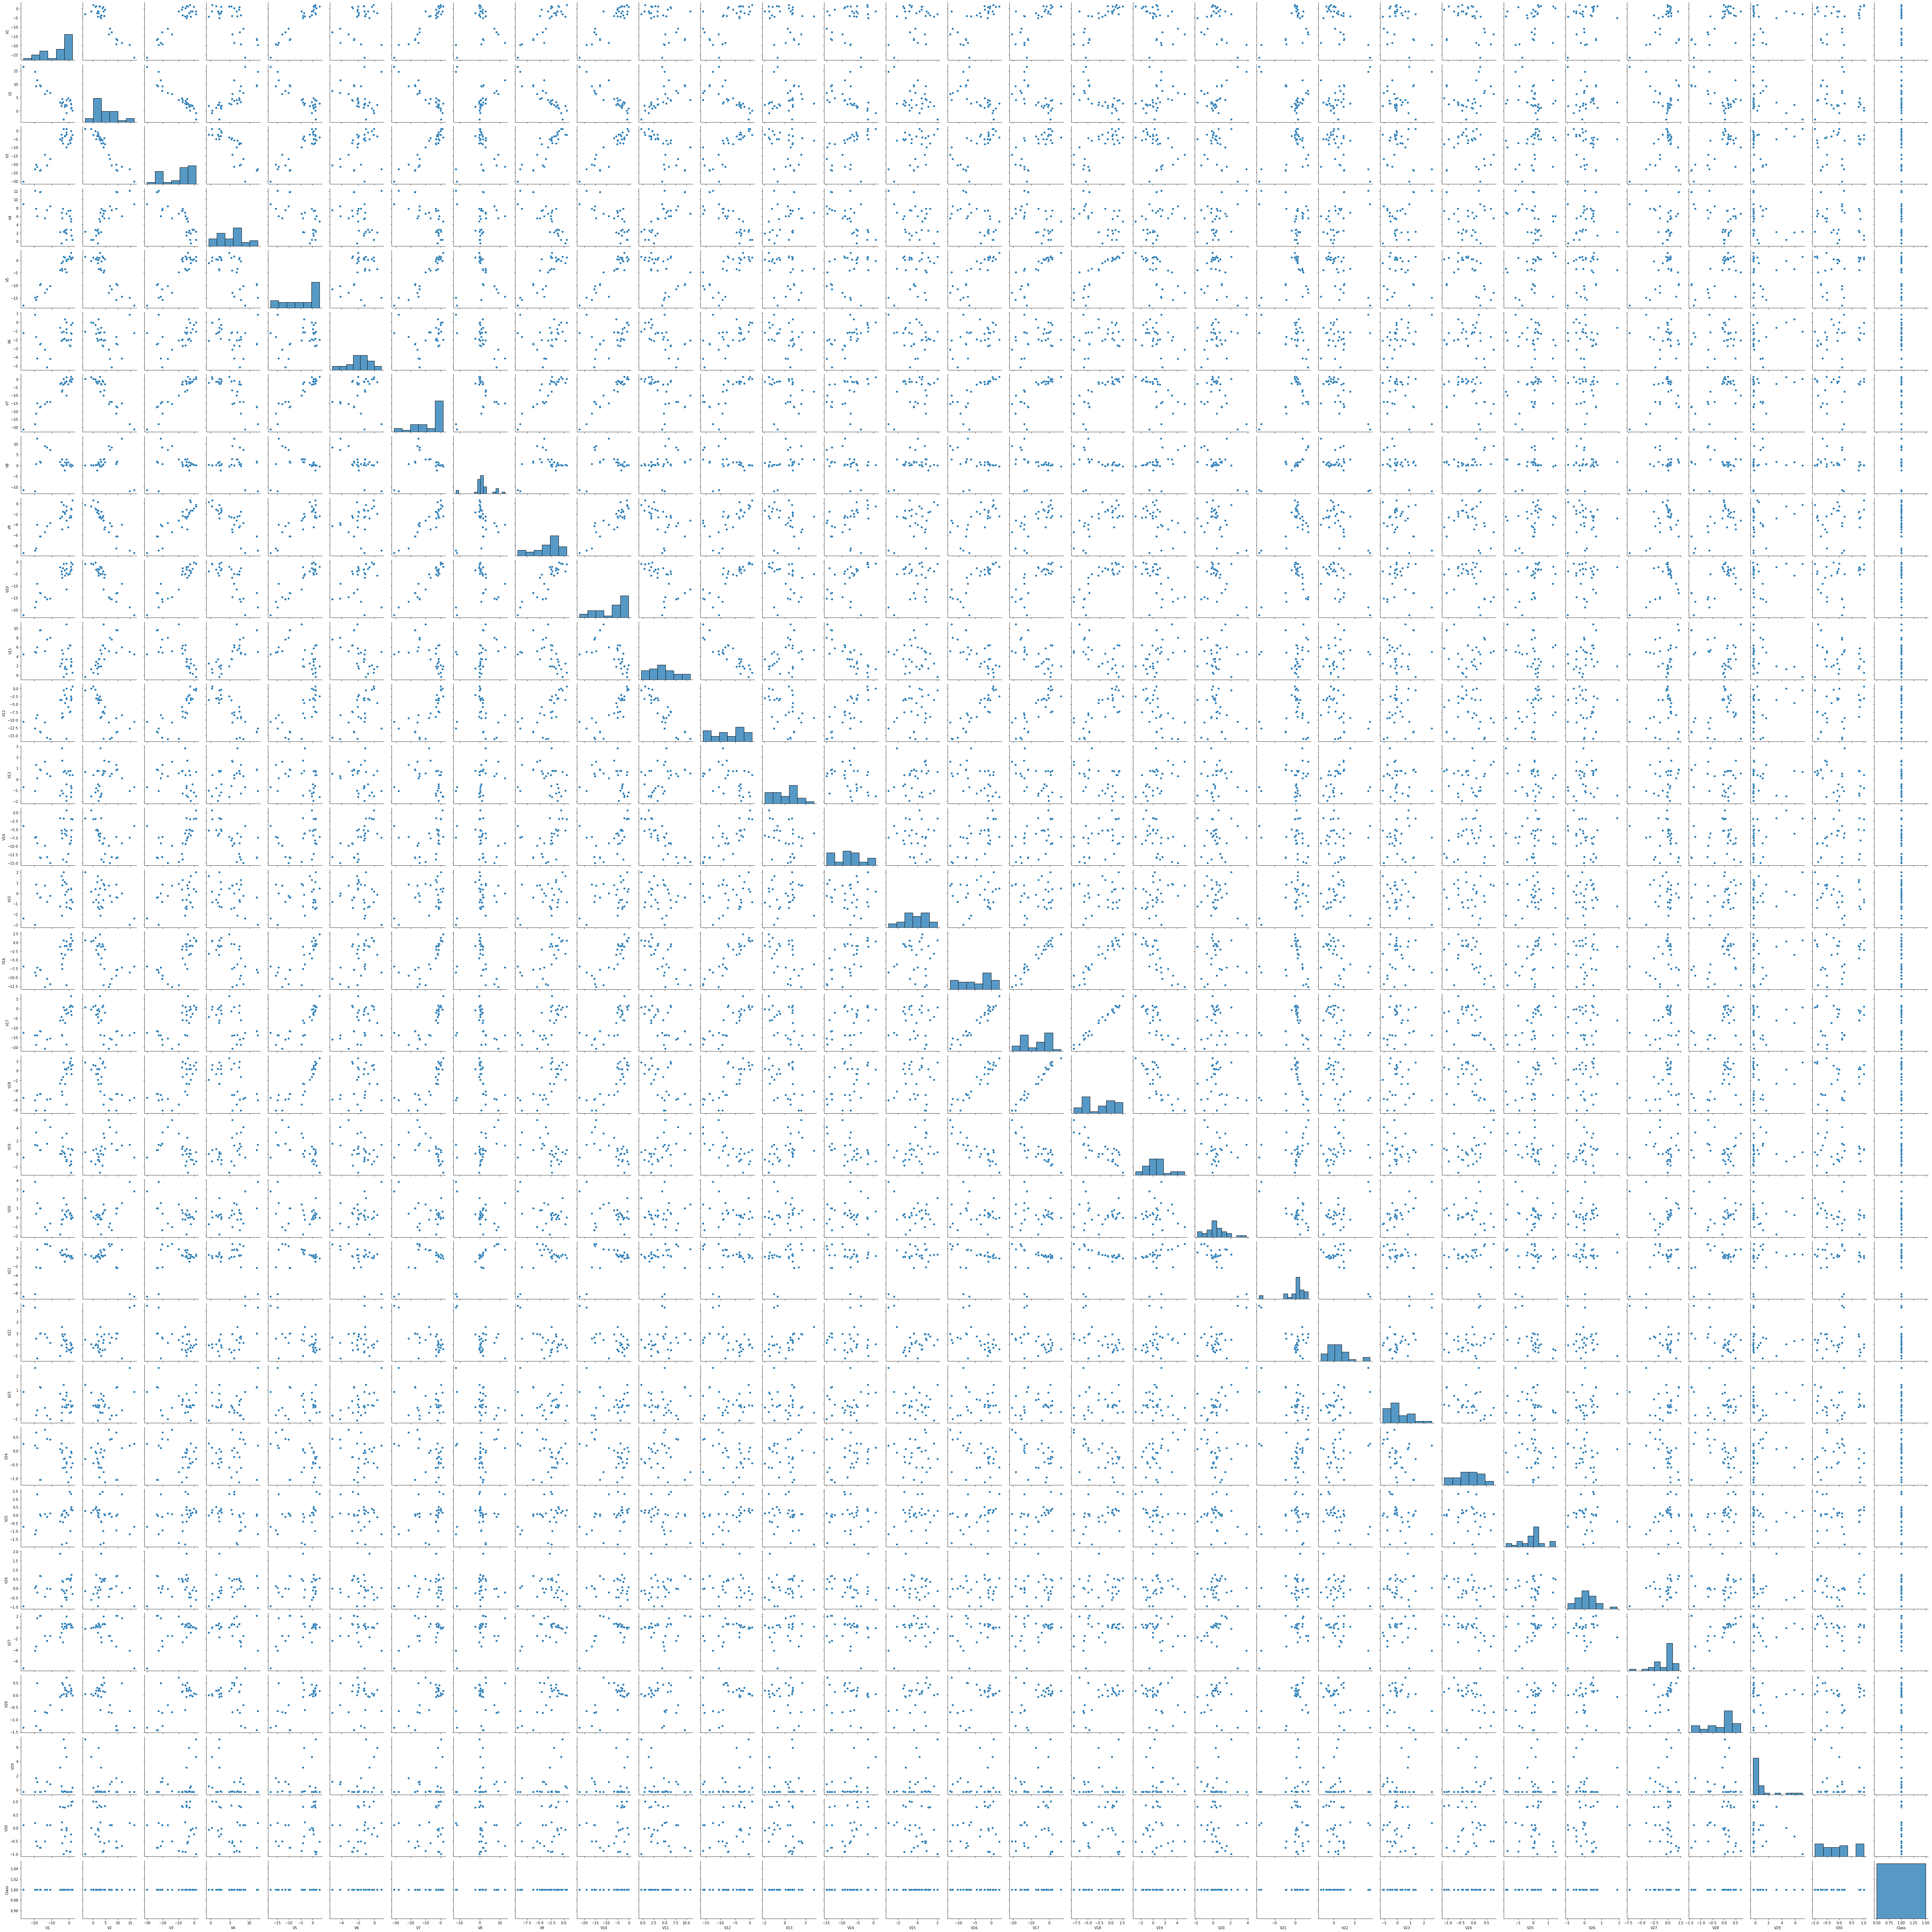

In [152]:
sns.pairplot(
    tval
)

In [148]:
tval_cor = tval.corr()

In [151]:
tval_cor[tval_cor >=0.8].iloc[:,:10]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
V1,1.000000,NaN,0.920675,NaN,0.957310,NaN,0.949168,NaN,0.845038,0.883988
V2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V3,0.920675,NaN,1.000000,NaN,0.909249,NaN,0.934877,NaN,0.865432,0.920446
V4,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
V5,0.957310,NaN,0.909249,NaN,1.000000,NaN,0.949137,NaN,0.838416,0.925154
V6,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
V7,0.949168,NaN,0.934877,NaN,0.949137,NaN,1.000000,NaN,0.911737,0.953349
V8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
V9,0.845038,NaN,0.865432,NaN,0.838416,NaN,0.911737,NaN,1.000000,0.876461
V10,0.883988,NaN,0.920446,NaN,0.925154,NaN,0.953349,NaN,0.876461,1.000000


In [95]:
train_df2.to_csv("./mod_Data/train_remove_ver1.csv",index=False)
val_x.to_csv("./mod_Data/val_x_remove_ver1.csv",index=False)
val_y.to_csv("./mod_Data/val_y_remove_ver1.csv",index=False)
train_x.to_csv("./mod_Data/test_x_remove_ver1.csv",index=False)


V3,V9,V10,V11,V12,V16,V18

In [50]:
test_df = pd.read_csv('../Data/test.csv') # Train
test_df.head()
test_x = test_df.drop(columns=['ID'])
test_pred = model.predict(test_x) # model prediction
test_pred = get_pred_label(test_pred)
## Submission
submit = pd.read_csv('../Data/sample_submission.csv')
submit.head()
submit['Class'] = test_pred
submit.to_csv('./submit.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: '../Data/test.csv'